# This Code has the purpose of identifying if a picture is a CAT or a DOG

The steps for doing that are:
- Organizing the data into train, valid and test directories

In [5]:
import os

os.chdir('dogs-vs-cats')
if os.path.isdir('train/dog') is False:
        os.makedirs('train/dog')
        os.makedirs('train/cat')
        os.makedirs('valid/dog')
        os.makedirs('valid/cat')
        os.makedirs('test/dog')
        os.makedirs('test/cat')

In [7]:
import glob
import random
import shutil

for c in random.sample(glob.glob('data/cat*'), 500):
    shutil.move(c, 'train/cat')
for c in random.sample(glob.glob('data/dog*'), 500):
    shutil.move(c, 'train/dog')
for c in random.sample(glob.glob('data/cat*'), 100):
    shutil.move(c, 'valid/cat')
for c in random.sample(glob.glob('data/dog*'), 100):
    shutil.move(c, 'valid/dog')
for c in random.sample(glob.glob('data/cat*'), 50):
    shutil.move(c, 'test/cat')
for c in random.sample(glob.glob('data/dog*'), 50):
    shutil.move(c, 'test/dog')


In [8]:
train_path = 'train'
valid_path = 'valid'
test_path = 'test'

In [18]:
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [19]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [20]:
imgs, labels = next(train_batches)

In [23]:
import matplotlib.pyplot as plt

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

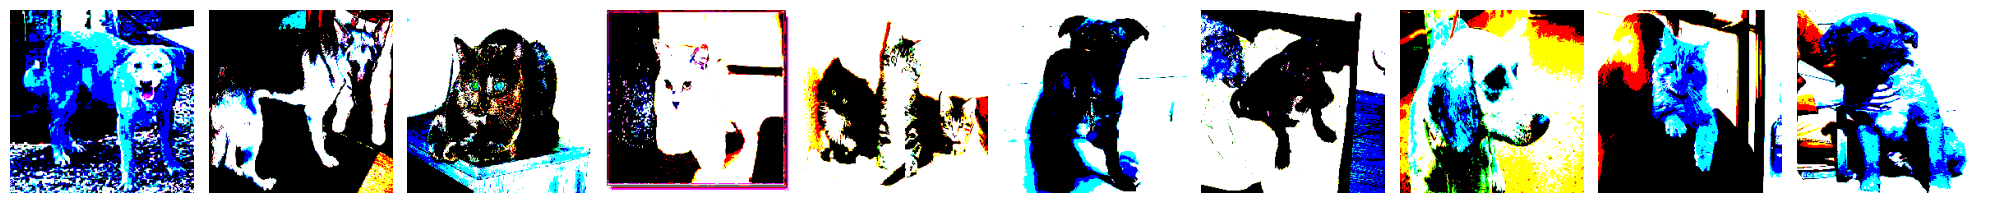

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [24]:
plotImages(imgs)
print(labels)

# Build and train a CNN

In [27]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 2)                 4

In [31]:
from keras.optimizers.legacy import Adam

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
100/100 - 14s - loss: 17.9434 - accuracy: 0.5570 - val_loss: 11.1546 - val_accuracy: 0.5050 - 14s/epoch - 138ms/step
Epoch 2/10
100/100 - 13s - loss: 2.1309 - accuracy: 0.7580 - val_loss: 2.1908 - val_accuracy: 0.6750 - 13s/epoch - 129ms/step
Epoch 3/10
100/100 - 13s - loss: 0.3922 - accuracy: 0.9120 - val_loss: 2.4920 - val_accuracy: 0.6400 - 13s/epoch - 129ms/step
Epoch 4/10
100/100 - 13s - loss: 0.1217 - accuracy: 0.9600 - val_loss: 2.1704 - val_accuracy: 0.6750 - 13s/epoch - 135ms/step
Epoch 5/10
100/100 - 14s - loss: 0.0328 - accuracy: 0.9890 - val_loss: 2.1869 - val_accuracy: 0.6800 - 14s/epoch - 136ms/step
Epoch 6/10
100/100 - 14s - loss: 0.0194 - accuracy: 0.9940 - val_loss: 1.8303 - val_accuracy: 0.6750 - 14s/epoch - 141ms/step
Epoch 7/10
100/100 - 14s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.8979 - val_accuracy: 0.6700 - 14s/epoch - 145ms/step
Epoch 8/10
100/100 - 14s - loss: 5.7440e-04 - accuracy: 1.0000 - val_loss: 1.8378 - val_accuracy: 0.6800 - 14s/epoch

# Predict the classes of the images

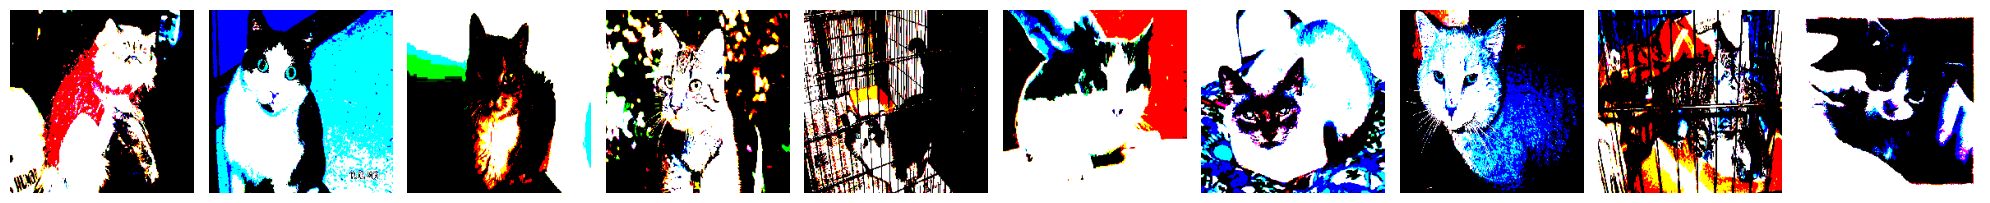

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [33]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [34]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [35]:
predictions = model.predict(x=test_batches, verbose=0)

In [39]:
import numpy as np

np.round(predictions)

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.

In [42]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [50]:
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix without normalization")

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [48]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix without normalization
[[30 20]
 [12 38]]


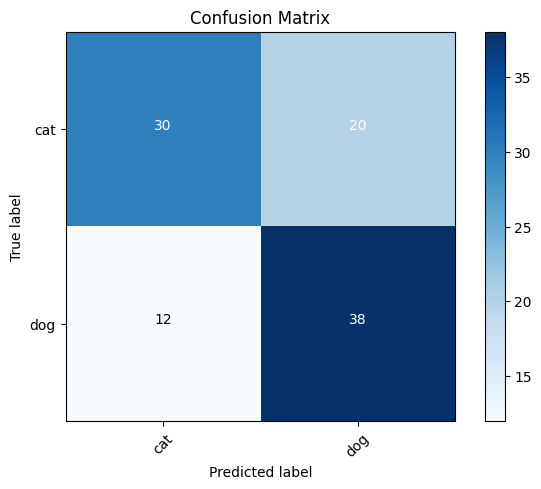

In [51]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')